<a href="https://colab.research.google.com/github/pritamgangwar/Retail-Sales-Prediction/blob/main/Rossmann_Sales_Prediction_PG_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# 1. Importing packages

In [ ]:
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [ ]:
#Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **2. Data preparation**

In [ ]:
#Reading The Dataset
R_stores = pd.read_csv('/content/drive/MyDrive/Copy of Rossmann Stores Data.csv')

In [ ]:
stores = pd.read_csv('/content/drive/MyDrive/Copy of store.csv')

In [ ]:
R_stores

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
stores

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
#Mearging the two data set
All_store = pd.merge(R_stores, stores, on = 'Store') 

In [ ]:
All_store

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [ ]:
All_store.info

<bound method DataFrame.info of          Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            1          4  2015-07-30   5020        546     1      1   
2            1          3  2015-07-29   4782        523     1      1   
3            1          2  2015-07-28   5011        560     1      1   
4            1          1  2015-07-27   6102        612     1      1   
...        ...        ...         ...    ...        ...   ...    ...   
1017204   1115          6  2013-01-05   4771        339     1      0   
1017205   1115          5  2013-01-04   4540        326     1      0   
1017206   1115          4  2013-01-03   4297        300     1      0   
1017207   1115          3  2013-01-02   3697        305     1      0   
1017208   1115          2  2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday StoreType Assortment  CompetitionDistance  \
0                  0  

In [ ]:
# converting the date column to datetime to extract year, month, day
All_store['Date'] = pd.to_datetime(All_store['Date'])

In [ ]:
All_store['year'] = pd.DatetimeIndex(All_store['Date']).year

All_store['month'] = pd.DatetimeIndex(All_store['Date']).month

All_store['day'] = pd.DatetimeIndex(All_store['Date']).day

In [ ]:
#dropping date coloumn as we have extracted year, month and day
All_store.drop(['Date'], axis=1, inplace = True)

In [ ]:
# Replacing all object to numerical value
All_store['StoreType'].replace (['a', 'b', 'c', 'd'], [0,1,2,3], inplace=True )

In [ ]:
All_store['Assortment'].replace (['a', 'b', 'c'], [0,1,2], inplace=True )

In [ ]:
All_store['StateHoliday'].replace (['0', 'a', 'b', 'c'], [0,1,2,3], inplace=True )

In [ ]:
All_store['PromoInterval'].replace (['Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'], [1,2,3], inplace=True)

In [ ]:
# Checking if the all the columns are converted to int or float
All_store.dtypes

Store                          int64
DayOfWeek                      int64
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                   int64
SchoolHoliday                  int64
StoreType                      int64
Assortment                     int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                float64
year                           int64
month                          int64
day                            int64
dtype: object

In [ ]:
# Checking forthe unique values
All_store.nunique()

Store                         1115
DayOfWeek                        7
Sales                        21734
Customers                     4086
Open                             2
Promo                            2
StateHoliday                     4
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            654
CompetitionOpenSinceMonth       12
CompetitionOpenSinceYear        23
Promo2                           2
Promo2SinceWeek                 24
Promo2SinceYear                  7
PromoInterval                    3
year                             3
month                           12
day                             31
dtype: int64

In [ ]:
# Checking for the null values
All_store.isnull().sum()

Store                             0
DayOfWeek                         0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
year                              0
month                             0
day                               0
dtype: int64

In [ ]:
# Percentage of the null values
All_store.isnull().mean()

Store                        0.000000
DayOfWeek                    0.000000
Sales                        0.000000
Customers                    0.000000
Open                         0.000000
Promo                        0.000000
StateHoliday                 0.000000
SchoolHoliday                0.000000
StoreType                    0.000000
Assortment                   0.000000
CompetitionDistance          0.002597
CompetitionOpenSinceMonth    0.317878
CompetitionOpenSinceYear     0.317878
Promo2                       0.000000
Promo2SinceWeek              0.499436
Promo2SinceYear              0.499436
PromoInterval                0.499436
year                         0.000000
month                        0.000000
day                          0.000000
dtype: float64

In [ ]:
# Considering there is not competation in a null areas, so addding 0 to the null values
All_store['CompetitionDistance'] = All_store['CompetitionDistance'].fillna(0)

In [ ]:
pd.isnull(All_store['CompetitionDistance']).sum()

0

In [ ]:
All_store['CompetitionOpenSinceYear'] = All_store['CompetitionOpenSinceYear'].fillna(All_store['CompetitionOpenSinceYear'].mean())

In [ ]:
All_store['CompetitionOpenSinceMonth'] = All_store['CompetitionOpenSinceMonth'].fillna(All_store['CompetitionOpenSinceMonth'].mean())

In [ ]:
# The columns in which promo2 was not done so there date and year is not available so filling the null value with 0
All_store['Promo2SinceWeek'] = All_store['Promo2SinceWeek'].fillna(0)
All_store['Promo2SinceYear'] = All_store['Promo2SinceYear'].fillna(0)
All_store['PromoInterval'] = All_store['PromoInterval'].fillna(0)

In [ ]:
# Checking all the null values are filled
All_store.isnull().mean()

Store                        0.0
DayOfWeek                    0.0
Sales                        0.0
Customers                    0.0
Open                         0.0
Promo                        0.0
StateHoliday                 0.0
SchoolHoliday                0.0
StoreType                    0.0
Assortment                   0.0
CompetitionDistance          0.0
CompetitionOpenSinceMonth    0.0
CompetitionOpenSinceYear     0.0
Promo2                       0.0
Promo2SinceWeek              0.0
Promo2SinceYear              0.0
PromoInterval                0.0
year                         0.0
month                        0.0
day                          0.0
dtype: float64

In [ ]:
round(All_store.describe(),2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.05,0.18,1.21,0.94,5415.98,7.22,2008.69,0.5,11.65,1007.01,0.81,2013.83,5.85,15.70
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.28,0.38,1.37,0.99,7710.25,2.65,4.95,0.5,15.32,1005.88,0.98,0.78,3.33,8.79
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1900.00,0.0,0.00,0.00,0.00,2013.00,1.00,1.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00,0.00,0.00,0.00,700.00,6.00,2008.00,0.0,0.00,0.00,0.00,2013.00,3.00,8.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00,0.00,0.00,0.00,2320.00,7.22,2008.69,1.0,1.00,2009.00,1.00,2014.00,6.00,16.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00,0.00,3.00,2.00,6880.00,9.00,2011.00,1.0,22.00,2012.00,1.00,2014.00,8.00,23.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,3.00,1.00,3.00,2.00,75860.00,12.00,2015.00,1.0,50.00,2015.00,3.00,2015.00,12.00,31.00


In [ ]:
All_store.corr()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000362,0.000641,-0.021604,0.004419,-0.026486,-0.041990,-0.003800,0.008488,0.011053,0.008520,-0.000898,0.000290,0.001467,0.000023
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.044265,-0.205388,0.000051,-0.000052,-0.000025,0.000005,-0.000021,0.000168,0.000208,0.000168,0.000074,0.001937,-0.005362,0.005136
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,-0.229029,0.085124,-0.013057,0.074941,-0.018609,-0.023489,0.010523,-0.091040,-0.044143,-0.091056,-0.092635,0.023519,0.048768,-0.011612
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,-0.204295,0.071568,-0.141423,0.007044,-0.102022,-0.025098,0.007241,-0.150159,-0.098323,-0.150138,-0.135765,-0.001212,0.038179,-0.004473
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,-0.340893,0.086171,-0.003325,0.002972,0.007989,0.001144,0.002290,-0.008309,-0.007436,-0.008308,-0.006659,-0.001009,-0.000681,0.033428
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,-0.024157,0.067483,-0.000299,0.000294,0.000141,-0.000019,0.000126,-0.000983,-0.001210,-0.000983,-0.000437,0.024300,-0.011747,-0.108325
StateHoliday,0.000362,-0.044265,-0.229029,-0.204295,-0.340893,-0.024157,1.000000,0.196424,0.001360,-0.001497,-0.000400,0.000428,-0.002025,0.004839,0.004622,0.004839,0.002981,-0.005067,0.038058,-0.015652
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,0.196424,1.000000,0.000032,-0.002530,-0.003651,-0.000434,0.001254,-0.006909,-0.006679,-0.006912,-0.005785,-0.036535,0.103282,0.030538
StoreType,-0.021604,0.000051,-0.013057,-0.141423,-0.003325,-0.000299,0.001360,0.000032,1.000000,0.232862,0.077056,0.021974,0.020492,0.088922,0.059704,0.088865,0.092566,-0.001514,-0.007692,-0.000109
Assortment,0.004419,-0.000052,0.074941,0.007044,0.002972,0.000294,-0.001497,-0.002530,0.232862,1.000000,0.146695,-0.000528,0.050380,0.008220,-0.030182,0.008267,0.043246,0.001494,0.007601,0.000104


# **EDA**

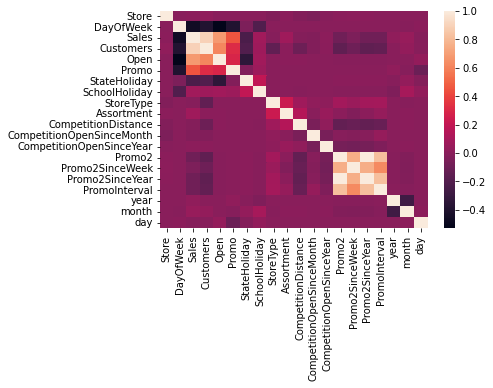

In [ ]:
sns.heatmap(All_store.corr())

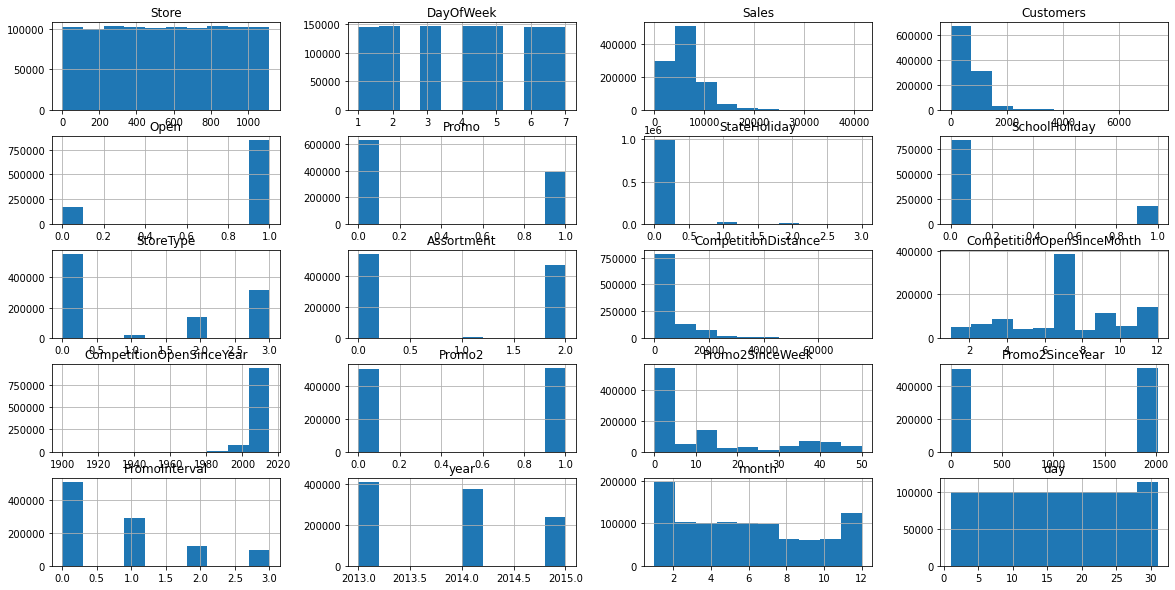

In [ ]:
All_store.hist(figsize=(20,10))
plt.show()

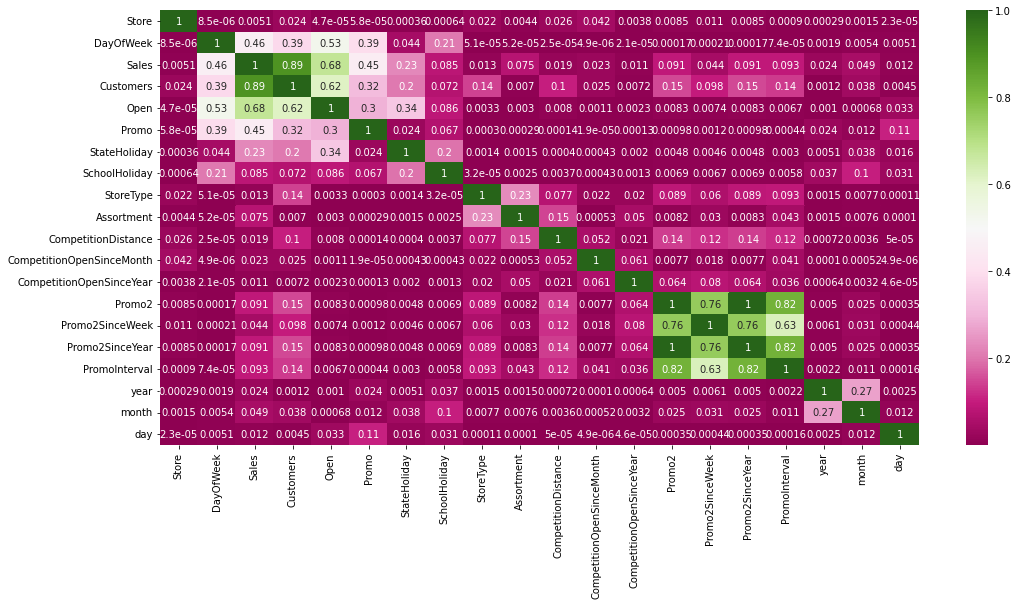

In [ ]:
plt.figure(figsize=(17,8))
correlation = All_store.corr()
sns.heatmap(abs(correlation), annot=True, cmap='PiYG')

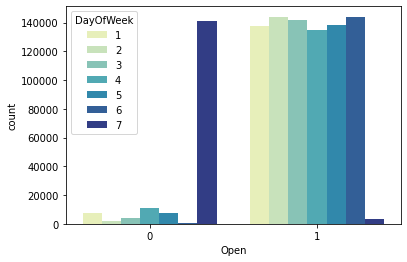

In [ ]:
ax = sns.countplot(x='Open', hue='DayOfWeek', data=All_store, palette='YlGnBu')

Text(0, 0.5, 'Sales')

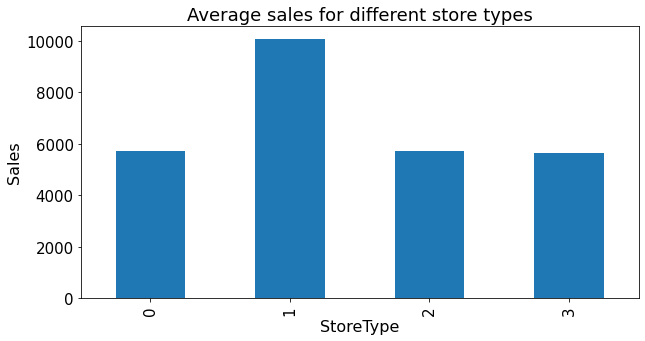

In [ ]:
# Create a figure object
ab = All_store.groupby(['StoreType'])['Sales'].mean().plot.bar(figsize=(10,5), fontsize=15)

# Set the title
ab.set_title("Average sales for different store types", fontsize=18)

# Set X and Y labels
ab.set_xlabel("StoreType", fontsize=16)
ab.set_ylabel("Sales", fontsize=16)

In [ ]:
All_store.StoreType.value_counts()

0    551627
3    312912
2    136840
1     15830
Name: StoreType, dtype: int64

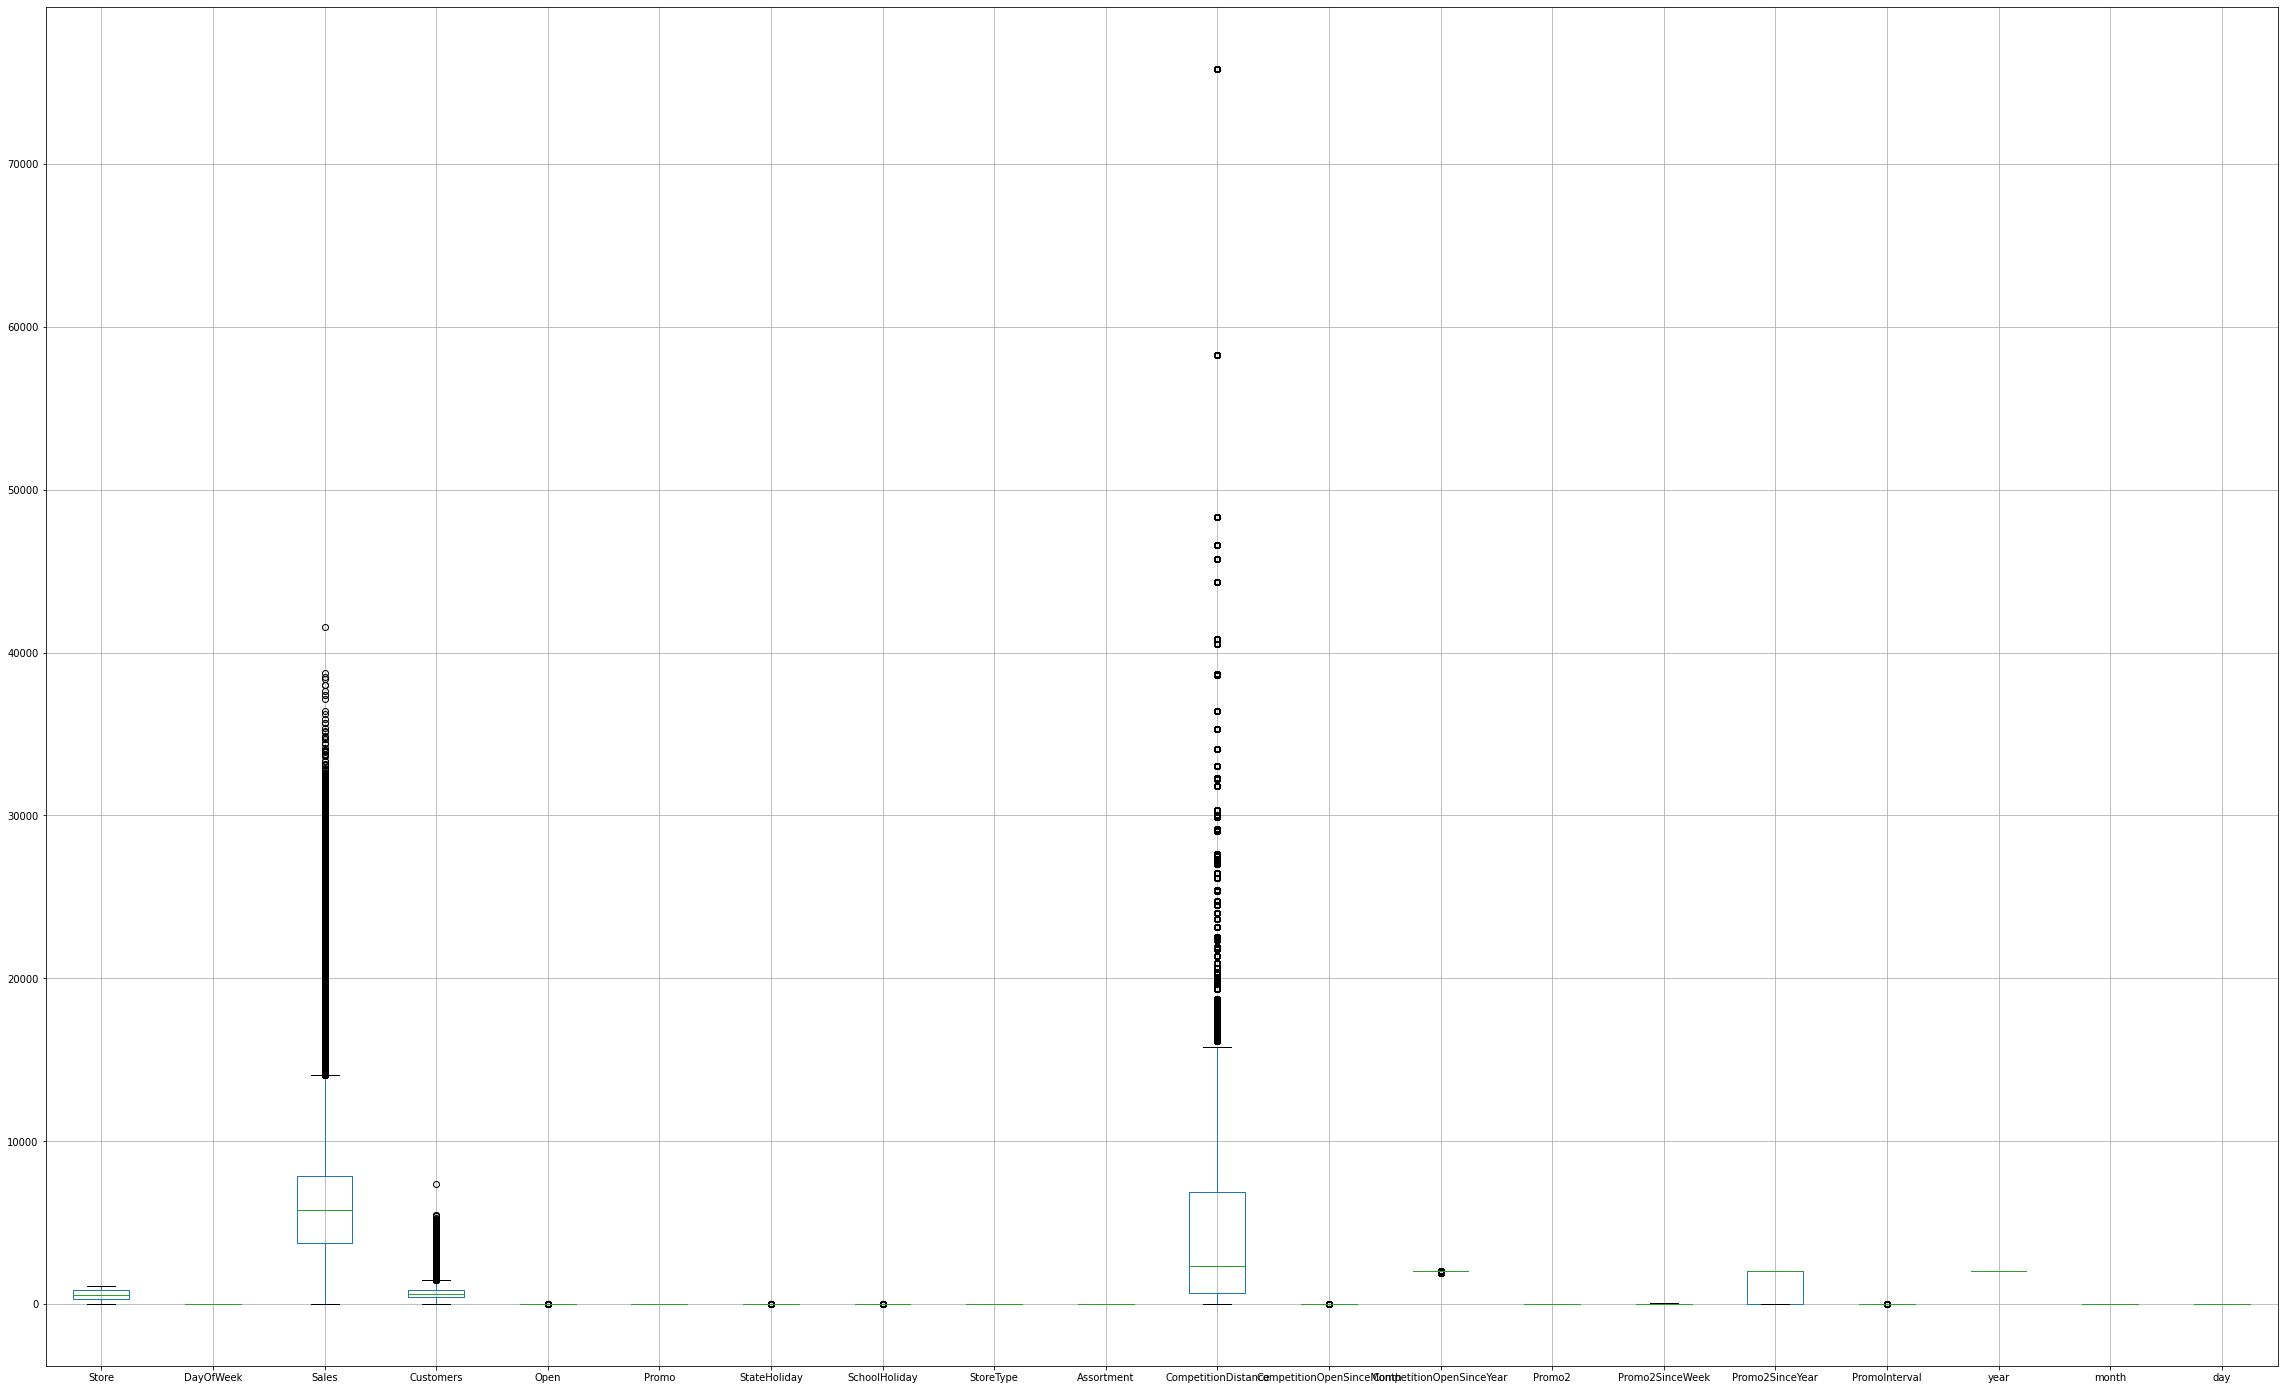

In [ ]:
boxplot = All_store.boxplot(figsize=(40,25))

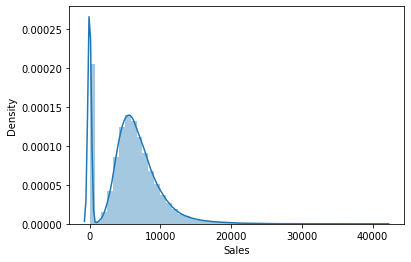

In [ ]:
sns.distplot(All_store['Sales'])

# **Regression**

In [ ]:
#defining x and y axis
x= All_store.drop(['Sales'],axis=1).values

In [ ]:
y = All_store['Sales'].values

In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
  x, y, test_size= 0.30, random_state=42)

**Linear Regression**

In [ ]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_pred,y_test)

0.8493885806989396

**Ridge and lasso regression**

In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
lass = Lasso(alpha = 0.1, max_iter = 2000)

In [ ]:
lass.fit(x_train,y_train)

Lasso(alpha=0.1, max_iter=2000)

In [ ]:
prediction_lasso = lass.predict(x_test)

In [ ]:
r2_score(y_test,prediction_lasso)

0.8684761773691394

# **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
des_regressor = DecisionTreeRegressor(random_state=10)
cross_val_score(des_regressor, x_train, y_train, cv=10).mean()

0.9722182474203022

In [ ]:
des_regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=10)

In [ ]:
y_pred_des = des_regressor.predict(x_test)

In [ ]:
r2_score(y_pred_des, y_test)

0.9720080820504533

# **Conclusion**

**We can conclude that decision tree gives the best result in regression analysis.**